In [16]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
np.linspace(-4,4,10)

array([-4.        , -3.11111111, -2.22222222, -1.33333333, -0.44444444,
        0.44444444,  1.33333333,  2.22222222,  3.11111111,  4.        ])

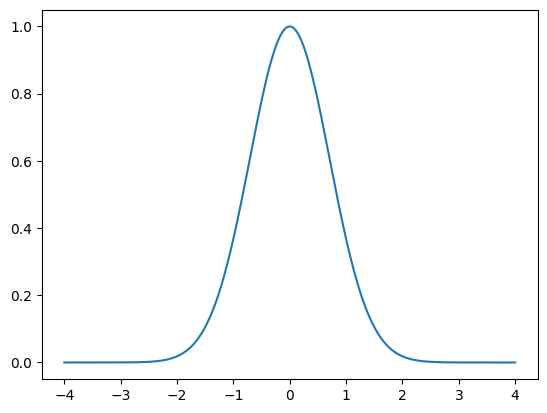

In [93]:
# where does the bell curve get its shape from?

x = np.linspace(-4,4,1000)
plt.plot(x, np.exp(-x**2))

In [1]:
# generating normal distributions

In [ ]:
# loc is mean, scale is std dev, size is no of values

<Axes: ylabel='Density'>

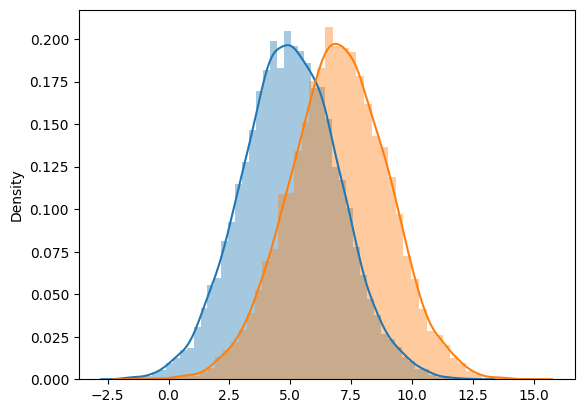

In [98]:
X1 = np.random.normal(loc=5, scale=2, size=10000)
X2 = np.random.normal(loc=7, scale=2, size=10000)
sns.distplot(X1)
sns.distplot(X2)

<Axes: ylabel='Density'>

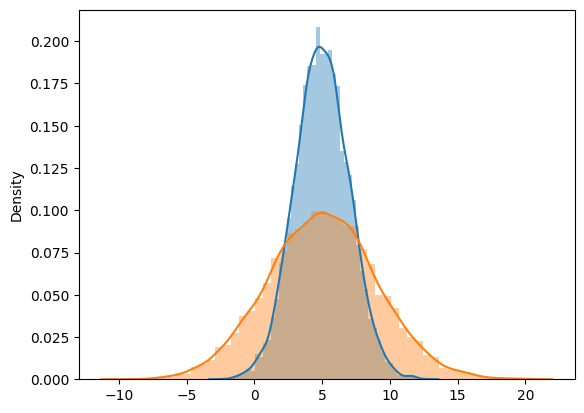

In [101]:
X1 = np.random.normal(loc=5, scale=2, size=10000)
X2 = np.random.normal(loc=5, scale=4, size=10000)
sns.distplot(X1)
sns.distplot(X2)

In [109]:
data = np.random.normal(loc=5, scale=2, size=10000)
data

array([3.7221585 , 6.65774594, 2.79836484, ..., 2.44736262, 2.09684614,
       6.56497932])

In [110]:
# plotting

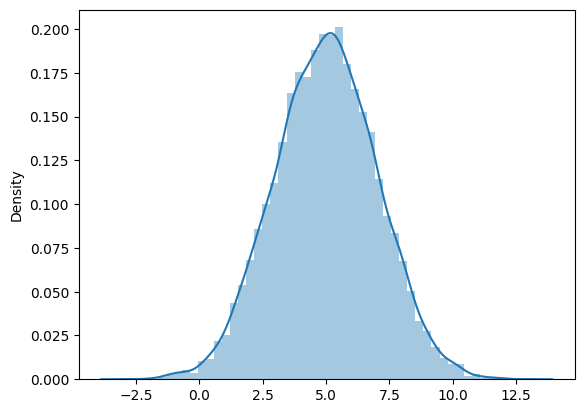

In [111]:
sns.distplot(data);

In [ ]:
# why individual value has zero probability in continuous distributions?

In [124]:
# probability of 4.5 in this dataset
data[(data == 4.5)]

array([], dtype=float64)

In [123]:
# range is more relevant
data[(data <= 4.5) & (data > 4)].shape[0] / data.shape[0]

0.0879

In [22]:
# chance of any specific value being in the dataset is zero or close to zero

In [3]:
# understanding the PDF of normal distribution

In [61]:
# following cell calculates pdf using formula and then using scipy library to show they are the same.

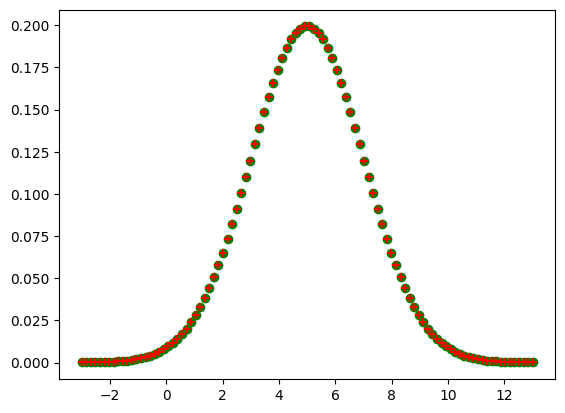

In [126]:
mu = 5
s = 2

# let us take 4 sigmas left and right of mu
x = np.linspace(mu-4*s,mu+4*s,100)

z = (x-mu)/s

pdf = 1/(np.sqrt(2*np.pi)*s) * np.exp(-0.5 * (z**2))

plt.scatter(x,pdf, marker = 'o', c='g')
plt.scatter(x,stats.norm.pdf(x, loc=5, scale=2), marker='+', c='r')

In [ ]:
np.random.normal(size=1000, loc=5, scale=2)

In [4]:
# values between comparing normal distributions using z scores

In [66]:
# a student in batch1 scores 75. the class marks followed normal distribution with mean 70 and stdev 3
# a student in batch2 scores 65. the class marks followed normal distribution with mean 63 and stdev 1

# compare z scores of the students and we can say that second student has done better. 
# this is like comparing their relative standing using percentiles.

(75 - 70)/3, (65 - 63)/1

(1.6666666666666667, 2.0)

In [5]:
# standard normal distribution

In [133]:
# X1 ~ N(10,2**2). a value of 12 is same as z = 1
# X2 ~ N(5,1**2). a value of 6 is same as z = 1
# X3 ~ N(100,20**2). a value of 120 is same as z = 1

# let us experiment to see if this is really. 
data_X1 = np.random.normal(loc=10, scale=2, size = 10000)
# check for values above 12
print(data_X1 [data_X1 > 12].shape[0]/data_X1.shape[0])

data_X2 = np.random.normal(loc=5, scale=1, size = 10000)
# check for values above 6
print(data_X2 [data_X2 > 6].shape[0]/data_X1.shape[0])

data_X3 = np.random.normal(loc=100, scale=20, size = 10000)
# check for values above 120
print(data_X3 [data_X3 > 120].shape[0]/data_X1.shape[0])

# z ~ N(0,1) and a value of z > 1
data_z = np.random.normal(loc=0, scale=1, size = 10000)
# check for values above 1
print(data_z [data_z > 1].shape[0]/data_X1.shape[0])

0.1622
0.1547
0.1659
0.1576


In [130]:
# the above values are very close indicating normal distributions are comparable using their z scores
# the standard normal distribution can be used to calculate probabilities and solve problems related to any normal distribution

In [140]:
# using z to get area under the curve

z = np.random.normal(loc=0, scale=1,size=10000)

# what is the probability of z being negative? we see 0.5
z[z<0].shape[0]/len(z)

0.4974

In [141]:
# what is the probability of z being less than -1.96? we see 0.025
z[z<-1.96].shape[0]/len(z)

0.0239

In [142]:
# what is the probability of z being more than 1.96? we see 0.025
z[z > 1.96].shape[0]/len(z)

0.0278

In [ ]:
# following scipy methods help us get similar probabilities

In [143]:
# area under normal curve to the left given z is given by cumulative density function
z = 0
stats.norm.cdf(z)

0.5

In [144]:
z = -1.96
stats.norm.cdf(z)

0.024997895148220435

In [145]:
z = -1.645
stats.norm.cdf(z)

0.049984905539121376

In [146]:
# given mu = 5, s = 2, get the area to the left of (mu -1.645 * s)
mu = 5
s = 2
stats.norm.cdf(mu - 1.645*s, loc=5, scale=2)

0.049984905539121376

In [147]:
# to the right

# area under normal curve to the right given z is given by survival function
z = 0
stats.norm.sf(z)

0.5

In [148]:
z = 1.96
stats.norm.sf(z)

0.024997895148220435

In [151]:
# given mu = 5, s = 2, get the area to the right of (mu -1.645 * s)
mu = 5
s = 2
stats.norm.sf(mu - 1.645*s, loc=5, scale=2)

0.9500150944608786

In [7]:
# using area under the curve to get z

In [152]:
# given area to the left, what is the z score? is given by Percent point function
left_area = 0.025
stats.norm.ppf(left_area)

-1.9599639845400545

In [153]:
# what is the z corresponding to area of 0.5 to the left?
left_area = 0.5
stats.norm.ppf(left_area)

0.0

In [154]:
# given area to the right, what is the z score? is given by inverse survival function
right_area = 0.025
stats.norm.isf(right_area)

1.9599639845400545

In [155]:
# what is the z corresponding to area of 0.5 to the right?
right_area = 0.5
stats.norm.isf(right_area)

0.0

In [10]:
# getting the PDF of the curve at different values i.e. the height of the curve at a given value of random variable

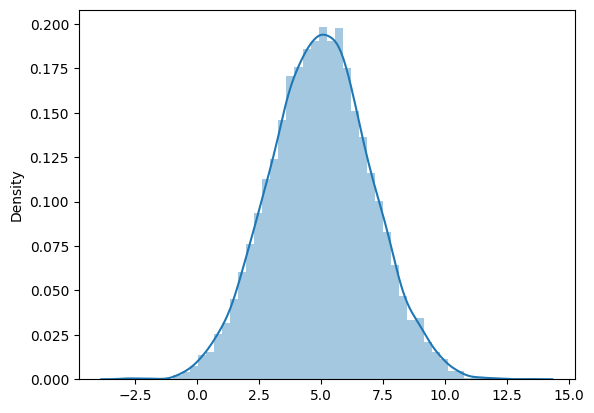

In [90]:
data = np.random.normal(loc=5, scale=2, size=10000)
sns.distplot(data);

In [91]:
x = mu
stats.norm.pdf(x,loc=mu,scale=s)

0.19947114020071635

In [157]:
x = 10
stats.norm.pdf(x,loc=mu,scale=s)

0.00876415024678427

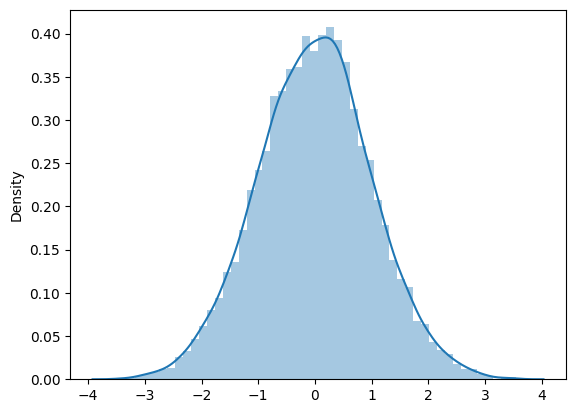

In [166]:
# from the formula of pdf we can see that at x=mu, the height is 1/(sqrt(2.pi) * s)
# in this case, we will have 1/(sqrt(2.pi) as the height at mu
data = np.random.normal(loc=0, scale=1, size=10000)
sns.distplot(data);

In [164]:
1 / np.sqrt(2 * np.pi)

0.3989422804014327

In [11]:
# solve problems using normal distributions